### Larger sample size.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('drive/My Drive/Teaching/LT_2021_2022/ST456/Week03')

Mounted at /content/drive


In [2]:
from tf_Fun2 import *

initialisation_tf()

2.7.0


In [33]:
data = pd.read_csv('data/HWdata.csv',index_col='Unnamed: 0')
data

,sig,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.100,5.882026,4.200079,3.489406,3.124438,2.005017,0.000000,0.570439,0.000000,0.000000,0.205417,0.072029,0.727137,0.380519,0.060838,0.221932,0.166837
1,0.101,5.747040,3.897421,3.156577,1.577247,0.000000,0.729570,0.530278,0.000000,1.136574,0.000000,0.022888,0.000000,0.766390,0.734679,0.077474,0.189081
2,0.102,4.556107,3.009602,2.826094,2.082787,1.690771,1.007935,0.000000,0.000000,0.000000,0.000000,0.000000,0.975388,0.000000,0.000000,0.000000,0.388745
3,0.103,4.193051,3.893630,2.552325,2.198397,0.822451,0.000000,0.089370,0.231508,0.035288,0.151412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.104,5.088713,3.799110,2.184968,2.236686,0.626456,0.440686,0.470741,0.082758,0.571912,0.000000,0.201185,0.000000,0.000000,0.000000,0.000000,0.028083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5895,5.995,10.261378,9.847935,9.621661,10.121708,9.129994,9.903817,9.511994,10.189040,10.753816,10.275191,10.242128,8.686475,10.153697,9.711721,9.106268,9.244174
5896,5.996,9.910282,9.938189,10.181377,10.366169,10.286996,9.851464,9.869348,9.629493,9.038880,9.716611,9.016776,9.900491,9.622121,10.476964,9.629640,8.762992
5897,5.997,9.106574,10.009333,10.287984,10.185600,9.782678,10.624150,10.525227,9.538092,10.647622,9.755995,9.360940,10.036177,9.866708,10.308698,9.284589,10.674247
5898,5.998,8.877205,9.683751,10.300631,8.918572,10.422146,9.516426,11.020574,9.373547,9.329358,9.523934,10.499946,10.774715,10.518766,8.952157,9.357721,10.743184


In [ ]:
y = data.pop('sig')
X = data

X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.3, random_state=0)

feature_normaliser = layers.Normalization(input_shape=[16], axis=1,name='normaliser')
feature_normaliser.adapt(X_train)

### Look at the good old linear regression

In [4]:
lr = linear_regression_make(feature_normaliser)
lr1 = linear_regression_make(feature_normaliser)

In [5]:
%%time
history = lr.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=int(X_train.shape[0]/200),
    verbose=0,
    validation_data = (X_test, y_test)
)

CPU times: user 39.4 s, sys: 4.75 s, total: 44.2 s
Wall time: 41.5 s


In [6]:
%%time
history1 = lr1.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=int(X_train.shape[0]/5),
    verbose=0,
    validation_data = (X_test, y_test)
)

CPU times: user 2.23 s, sys: 230 ms, total: 2.46 s
Wall time: 2.88 s


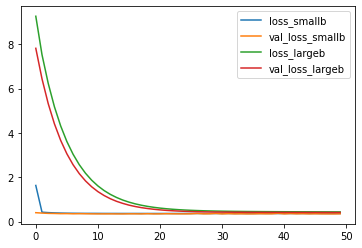

In [7]:
df(history.history).join(df(history1.history),lsuffix='_smallb',rsuffix='_largeb').plot()

In [8]:
y_pred0 = lr.predict(X)
y_pred1 = lr1.predict(X)

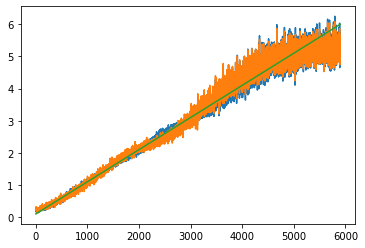

In [35]:
plt.plot(y_pred0)
plt.plot(y_pred1)
plt.plot(y)

### Now let's go to the case of non-linear NNs: (HW starts here)

In [10]:
m1 = Model1_make(feature_normaliser)
m2 = Model1_make(feature_normaliser)

In [11]:
%%time
history_200, m1_trained_200 = Model_fit(m1,X_train,y_train,X_test,y_test,200)

CPU times: user 41.7 s, sys: 4.73 s, total: 46.4 s
Wall time: 35.4 s


In [12]:
%%time
history_5, m1_trained_5 = Model_fit(m2,X_train,y_train,X_test,y_test,5)

CPU times: user 2.32 s, sys: 217 ms, total: 2.54 s
Wall time: 2.42 s


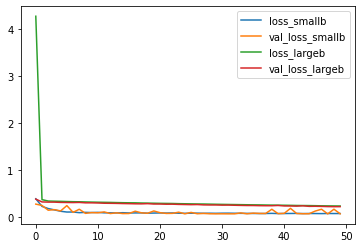

In [13]:
df(history_200.history).join(df(history_5.history),lsuffix='_smallb',rsuffix='_largeb').plot()

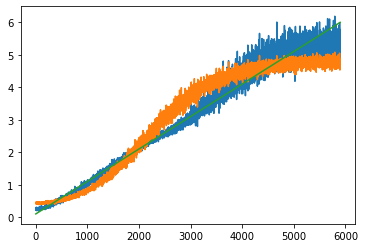

In [14]:
y_pred0 = m1_trained_200.predict(X)
y_pred1 = m1_trained_5.predict(X)

plt.plot(y_pred0)
plt.plot(y_pred1)
plt.plot(y)

In [15]:
def add_one_more_layer():
    m1 = Model1_make(feature_normaliser,learning_rate=0.01)
    m1.add(layers.Dense(1,kernel_initializer=initializers.Ones(),activation='ReLU',name='ReLU_at_the_end'))
    return m1

In [16]:
m1 = add_one_more_layer()
m2 = add_one_more_layer()
m1.summary()

Model: "One_layer_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normaliser (Normalization)  (None, 16)                33        
                                                                 
 sigmoid (Dense)             (None, 16)                272       
                                                                 
 dense_after_sigmoid (Dense)  (None, 1)                17        
                                                                 
 ReLU_at_the_end (Dense)     (None, 1)                 2         
                                                                 
Total params: 324
Trainable params: 291
Non-trainable params: 33
_________________________________________________________________


In [17]:
%%time
history_200, m1_trained_200 = Model_fit(m1,X_train,y_train,X_test,y_test,200)

CPU times: user 42.7 s, sys: 5.07 s, total: 47.8 s
Wall time: 41.4 s


In [18]:
%%time
history_5, m1_trained_5 = Model_fit(m2,X_train,y_train,X_test,y_test,5)

CPU times: user 2.49 s, sys: 205 ms, total: 2.69 s
Wall time: 2.64 s


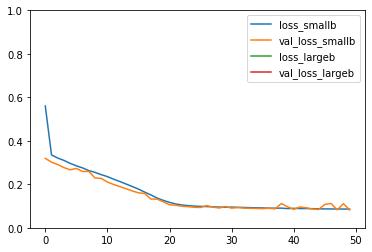

In [19]:
df(history_200.history).join(df(history_5.history),lsuffix='_smallb',rsuffix='_largeb').plot(ylim=(0,1))

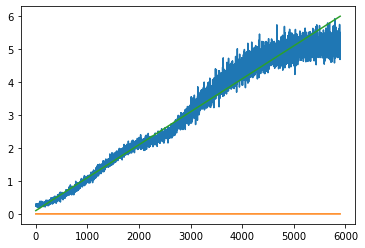

In [20]:
y_pred0 = m1_trained_200.predict(X)
y_pred1 = m1_trained_5.predict(X)

plt.plot(y_pred0)
plt.plot(y_pred1)
plt.plot(y)

In [21]:
m1 = add_one_more_layer()
m2 = add_one_more_layer()

In [22]:
%%time
history_200, m1_trained_200 = Model_fit(m1,X_train,y_train,X_test,y_test,200,epochs=100)

CPU times: user 1min 25s, sys: 9.8 s, total: 1min 35s
Wall time: 1min 14s


In [23]:
%%time
history_5, m1_trained_5 = Model_fit(m2,X_train,y_train,X_test,y_test,5,epochs=800)

CPU times: user 30 s, sys: 3.32 s, total: 33.3 s
Wall time: 41.3 s


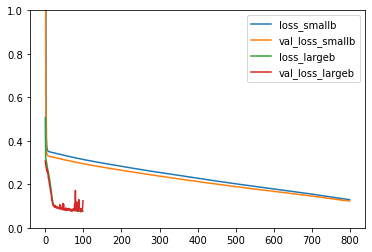

In [24]:
df(history_5.history).join(df(history_200.history),lsuffix='_smallb',rsuffix='_largeb').plot(ylim=(0,1))

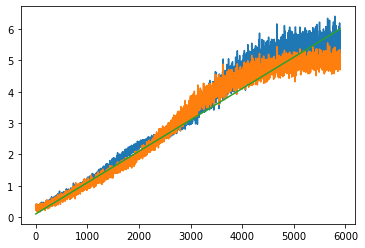

In [25]:
y_pred0 = m1_trained_200.predict(X)
y_pred1 = m1_trained_5.predict(X)

plt.plot(y_pred0)
plt.plot(y_pred1)
plt.plot(y)

In [26]:
print('Model with 200 batches after 100 epochs: %.3f' % m1_trained_200.evaluate(X_test, y_test, verbose=0))
print('Model with 5 batches after 800 epochs: %.3f' % m1_trained_5.evaluate(X_test, y_test, verbose=0))

Model with 200 batches after 100 epochs: 0.124
Model with 5 batches after 800 epochs: 0.123


In [27]:
%%time
history_200, m1_trained_200 = Model_fit(m1,X_train,y_train,X_test,y_test,200,epochs=700)

CPU times: user 9min 55s, sys: 1min 8s, total: 11min 4s
Wall time: 9min 21s


Model with 200 batches after 800 epochs:: 0.066
Model with 5 batches after 800 epochs: 0.123


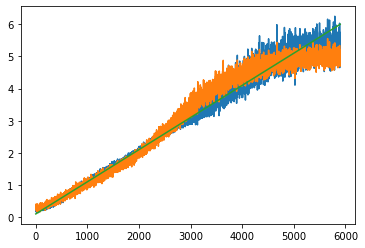

In [28]:
y_pred0 = m1_trained_200.predict(X)

plt.plot(y_pred0)
plt.plot(y_pred1)
plt.plot(y)

print('Model with 200 batches after 800 epochs:: %.3f' % m1_trained_200.evaluate(X_test, y_test,verbose=0))
print('Model with 5 batches after 800 epochs: %.3f' % m1_trained_5.evaluate(X_test, y_test,verbose=0))

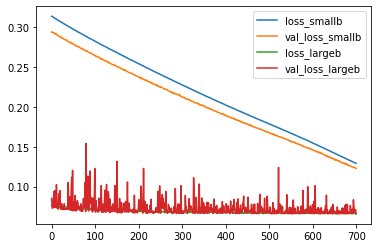

In [29]:
df(history_5.history)[100:].reset_index(drop=True).join(df(history_200.history),lsuffix='_smallb',rsuffix='_largeb').plot()

In [30]:
%%time
history_5, m1_trained_5 = Model_fit(m1_trained_5,X_train,y_train,X_test,y_test,5,epochs=2200)

CPU times: user 1min 23s, sys: 8.51 s, total: 1min 31s
Wall time: 1min 25s


Model with 200 batches after 800 epochs:: 0.066
Model with 5 batches after 3000 epochs: 0.075


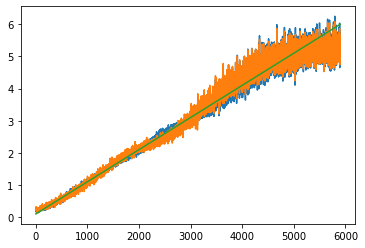

In [31]:
y_pred1 = m1_trained_5.predict(X)

plt.plot(y_pred0)
plt.plot(y_pred1)
plt.plot(y)

print('Model with 200 batches after 800 epochs:: %.3f' % m1_trained_200.evaluate(X_test, y_test,verbose=0))
print('Model with 5 batches after 3000 epochs: %.3f' % m1_trained_5.evaluate(X_test, y_test,verbose=0))

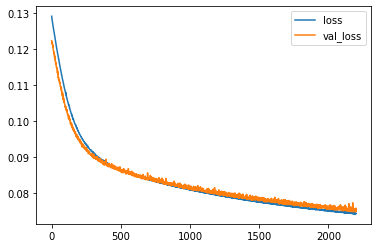

In [32]:
df(history_5.history).plot()